In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import datetime

SEED = 42
np.random.seed(SEED)

In [2]:
train_sales = pd.read_csv("./data/train.csv")

In [5]:
num_families = train_sales["family"].unique().shape[0]
print(num_families)

33


In [6]:
num_stores = train_sales["store_nbr"].unique().shape[0]
print(num_stores)

54


In [7]:
train_sales["family"].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [2]:


num_stores = 9
num_ids = 4

random_stores = np.random.choice(
                                train_sales["store_nbr"].unique(),
                                num_stores
                                )
random_fam = {}
for rand_store in random_stores:
    random_fam[rand_store] = np.random.choice(
        train_sales.loc[train_sales["store_nbr"] == rand_store, "family"],
        num_ids
    )

In [3]:
random_fam

{np.int64(44): array(['GROCERY II', 'BEVERAGES', 'PERSONAL CARE', 'DELI'], dtype=object),
 np.int64(7): array(['HOME CARE', 'BREAD/BAKERY', 'BEAUTY', 'EGGS'], dtype=object),
 np.int64(35): array(['MEATS', 'SCHOOL AND OFFICE SUPPLIES', 'BABY CARE',
        'HOME APPLIANCES'], dtype=object),
 np.int64(22): array(['GROCERY I', 'HOME AND KITCHEN II', 'BEAUTY',
        'HOME AND KITCHEN II'], dtype=object),
 np.int64(48): array(['PLAYERS AND ELECTRONICS', 'MEATS', 'LADIESWEAR',
        'HOME APPLIANCES'], dtype=object),
 np.int64(16): array(['AUTOMOTIVE', 'HOME APPLIANCES', 'DAIRY', 'MEATS'], dtype=object),
 np.int64(28): array(['FROZEN FOODS', 'BABY CARE', 'LAWN AND GARDEN', 'HOME CARE'],
       dtype=object),
 np.int64(26): array(['PERSONAL CARE', 'PREPARED FOODS', 'PET SUPPLIES',
        'HOME APPLIANCES'], dtype=object)}

/tmp/ipykernel_5774/2648621928.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


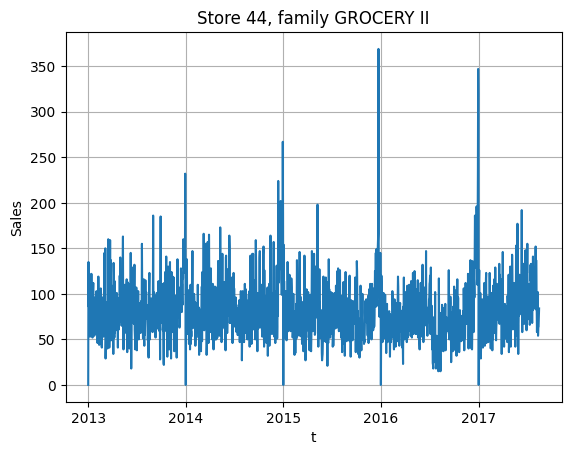

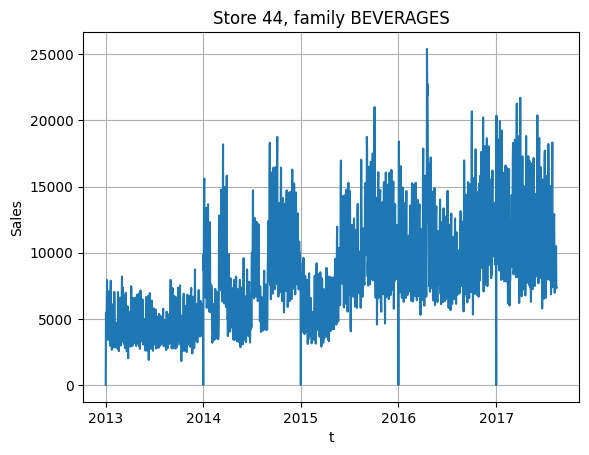

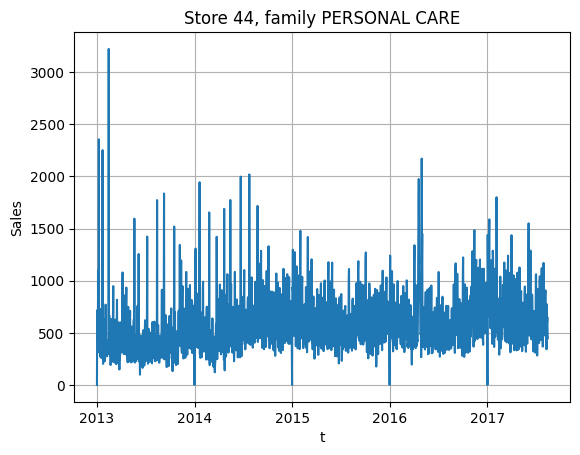

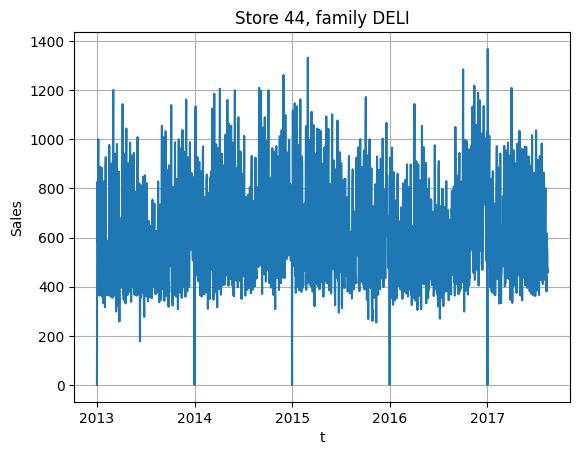

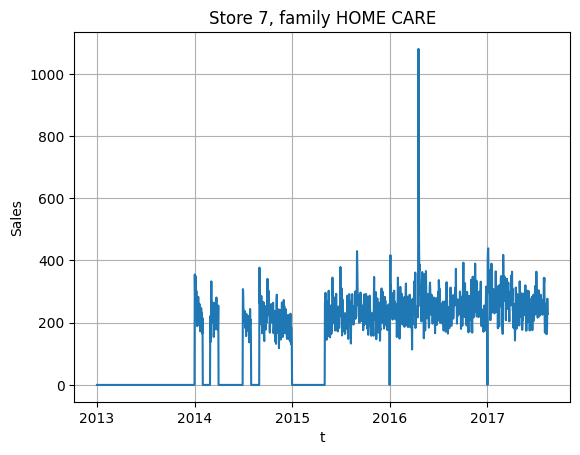

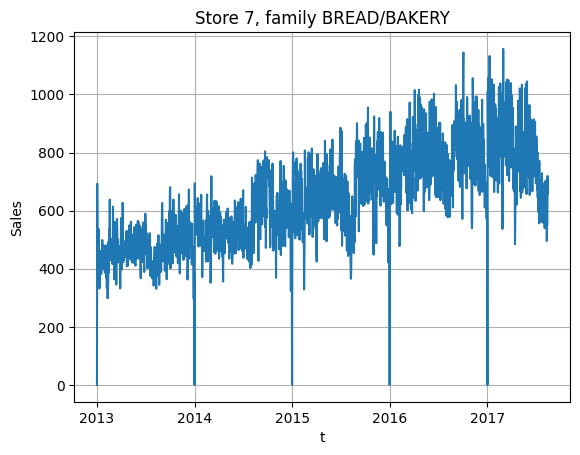

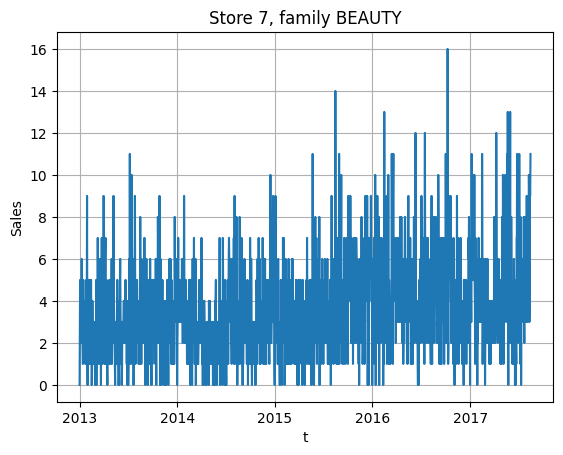

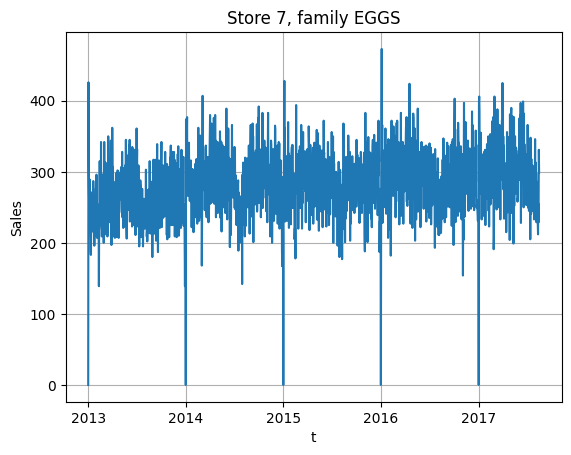

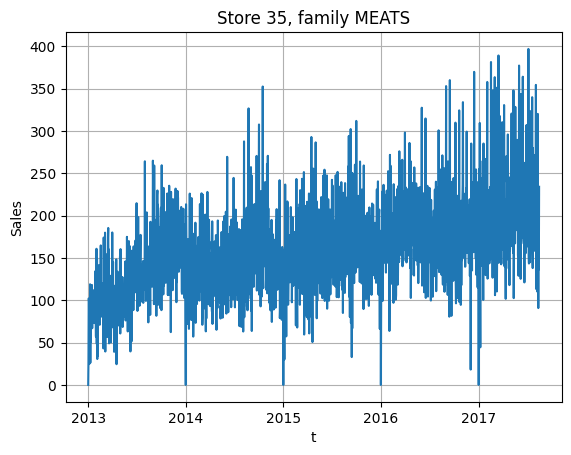

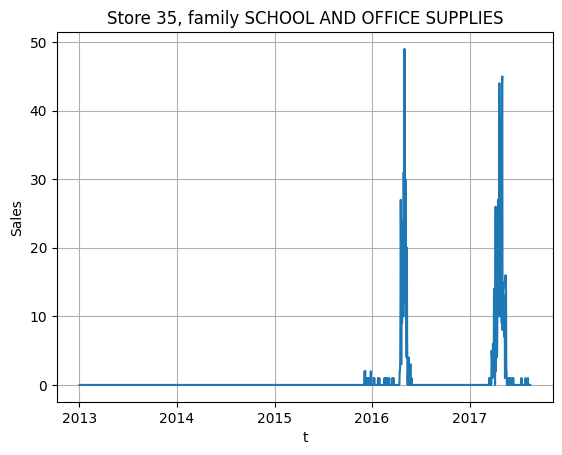

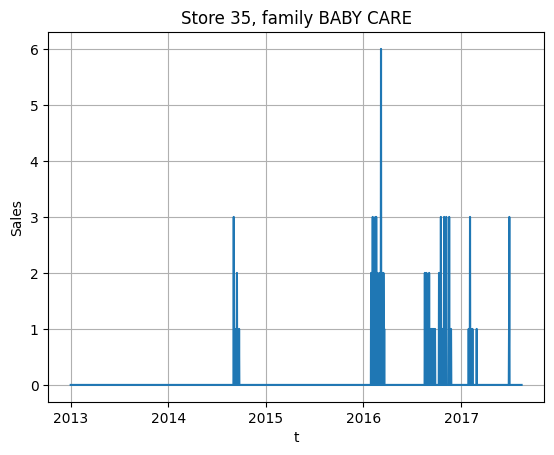

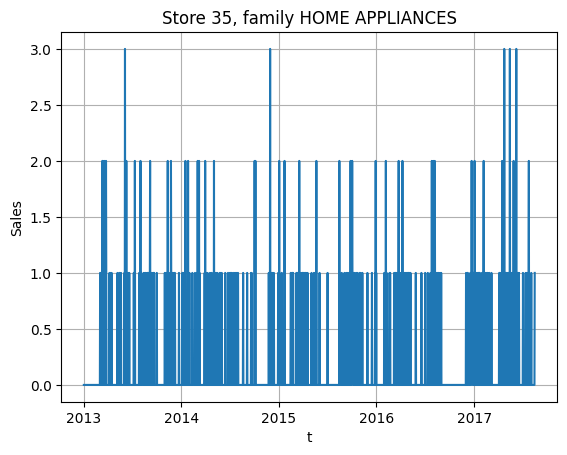

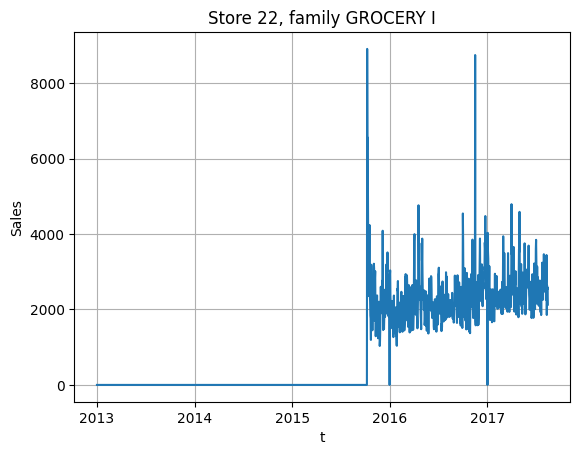

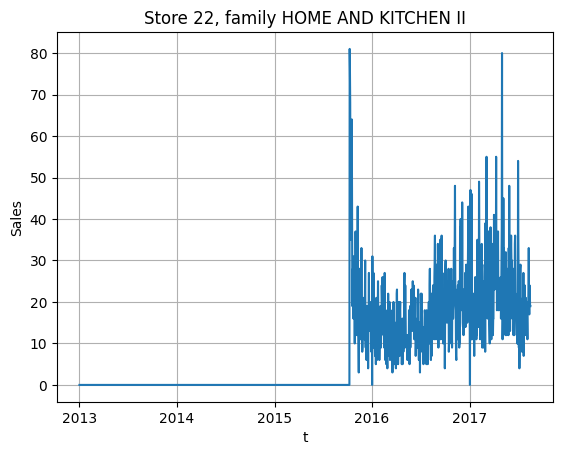

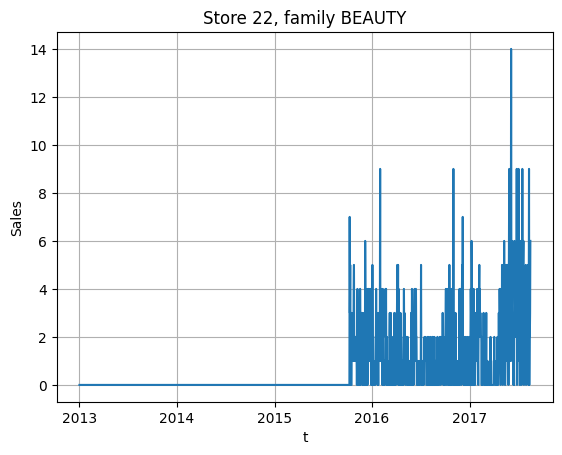

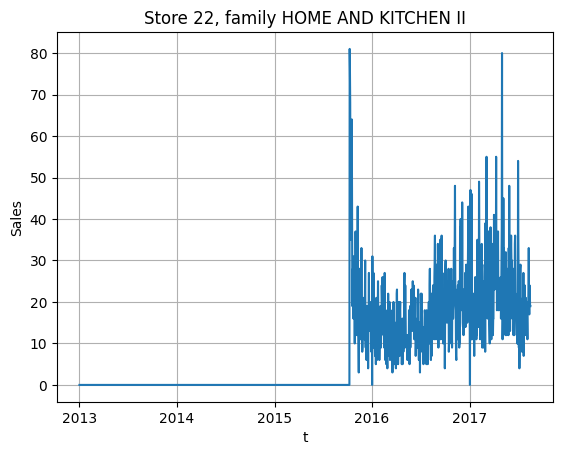

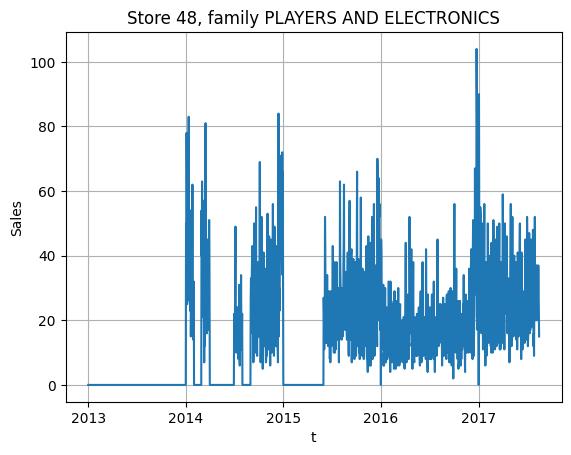

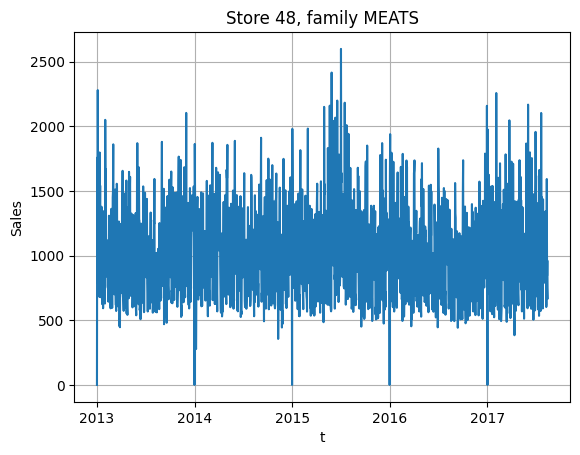

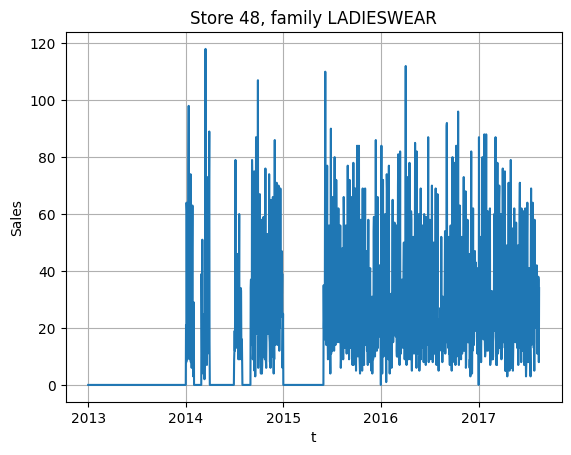

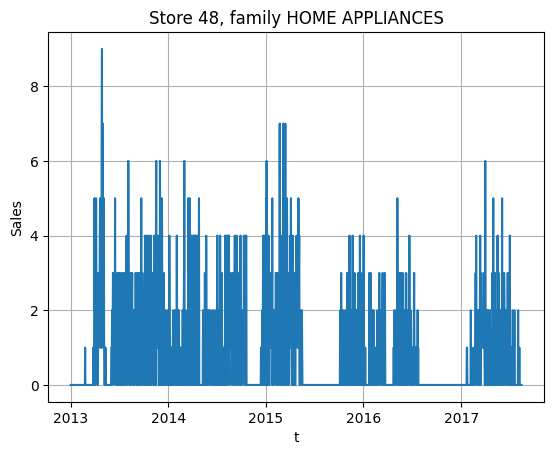

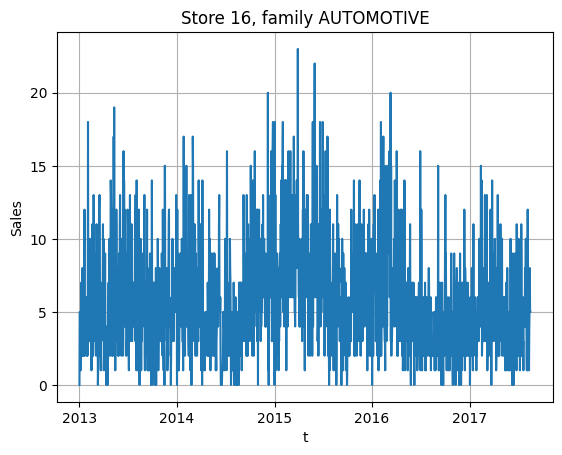

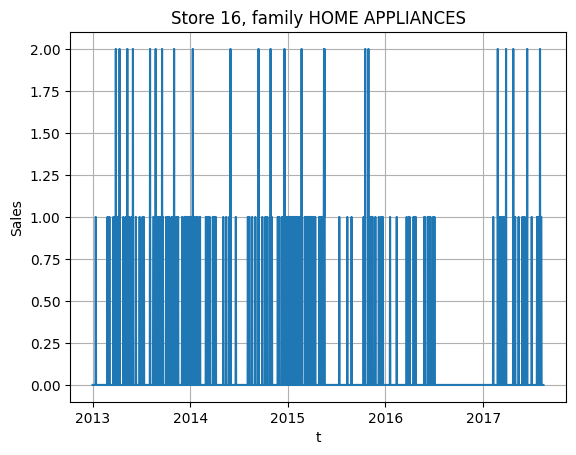

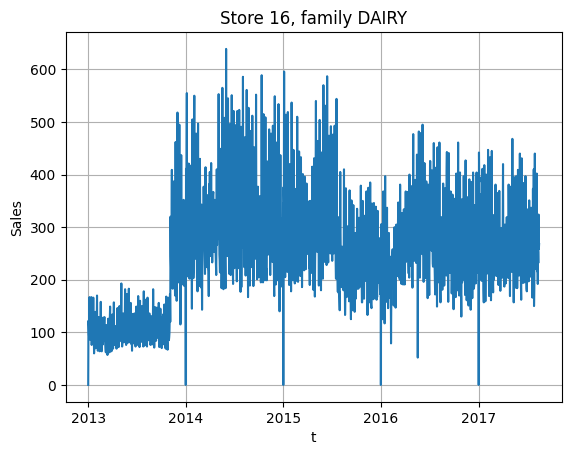

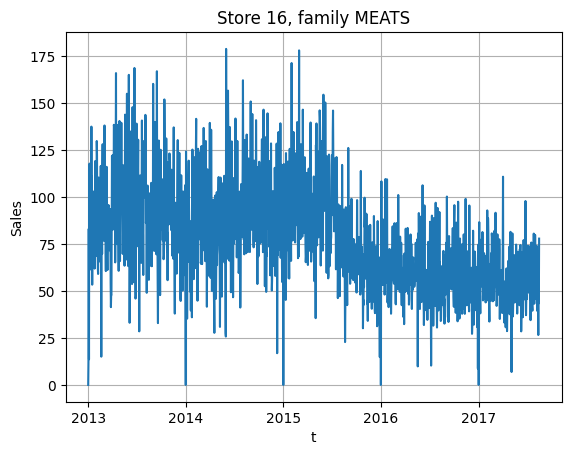

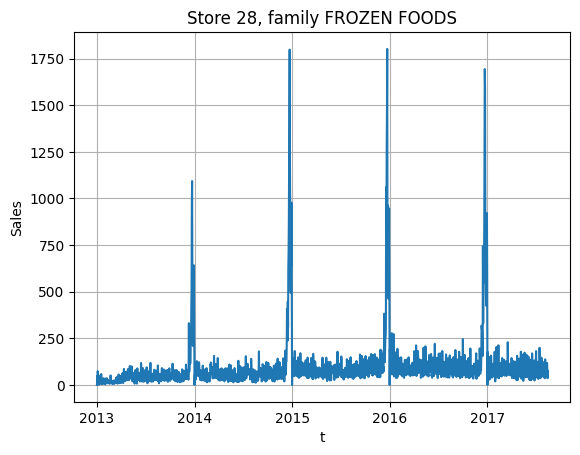

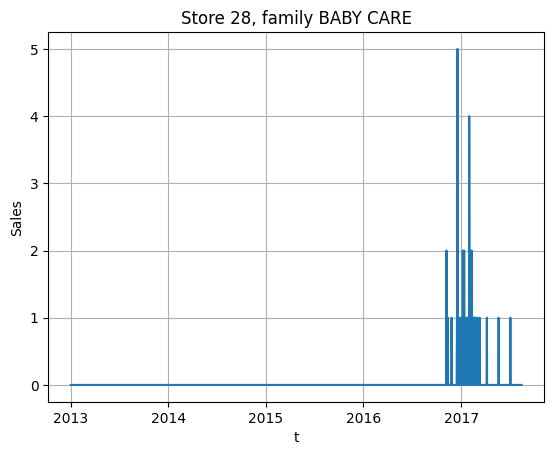

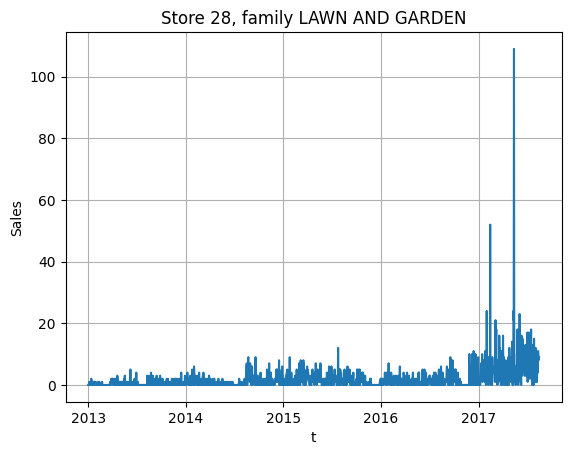

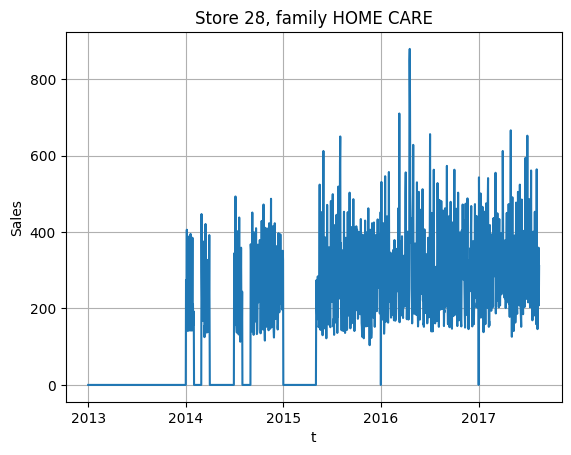

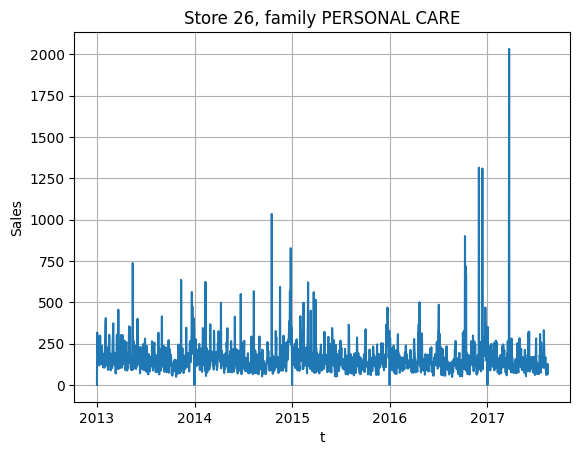

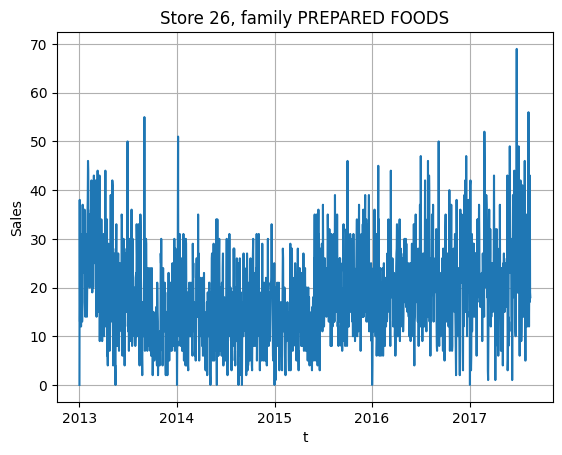

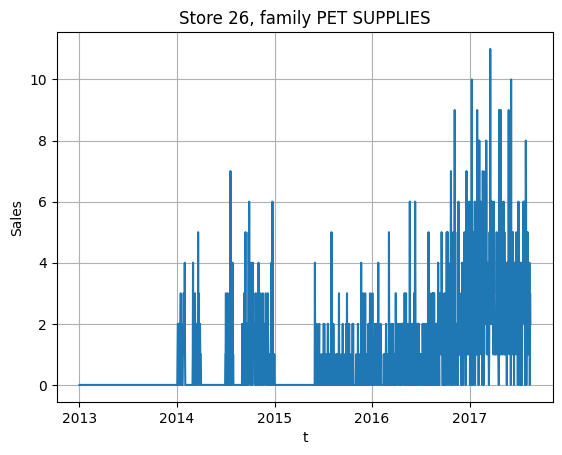

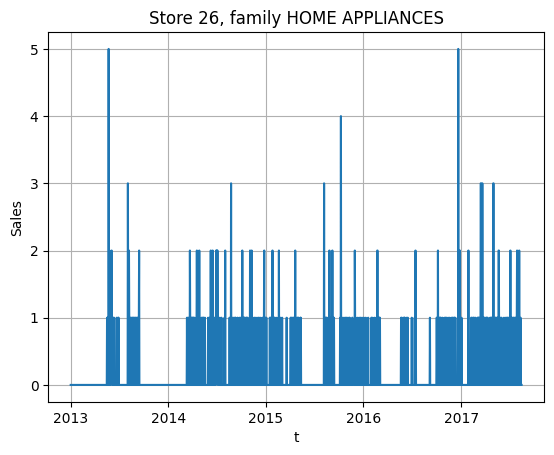

In [4]:
for rand_store, rand_fams in random_fam.items():
    for rand_fam in rand_fams:
        fig, ax = plt.subplots()

        sales_data = train_sales.loc[(train_sales["family"] == rand_fam) & (train_sales["store_nbr"] == rand_store)]
        ax.plot(sales_data["date"].astype('datetime64[s]'), sales_data["sales"])

        ax.grid(True)
        ax.set_ylabel("Sales")
        ax.set_xlabel("t")
        ax.set_title(f"Store {rand_store}, family {rand_fam}")

/tmp/ipykernel_5774/2114999703.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))


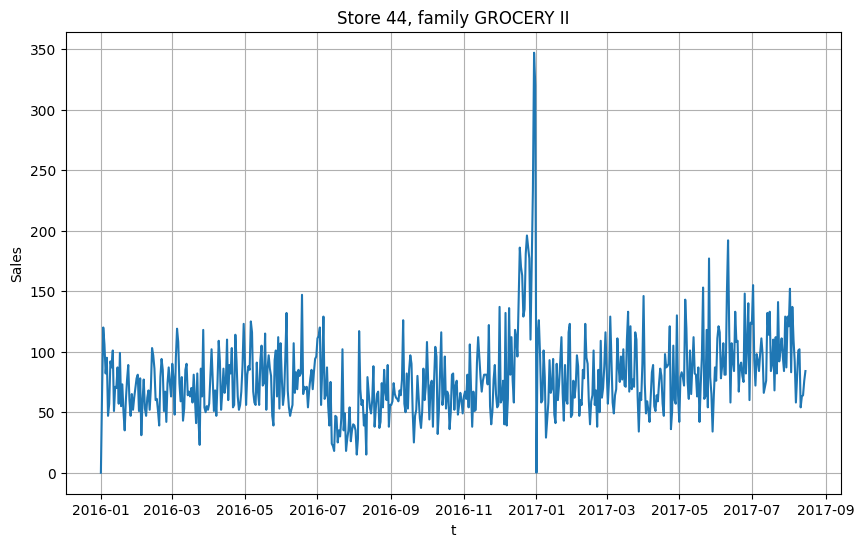

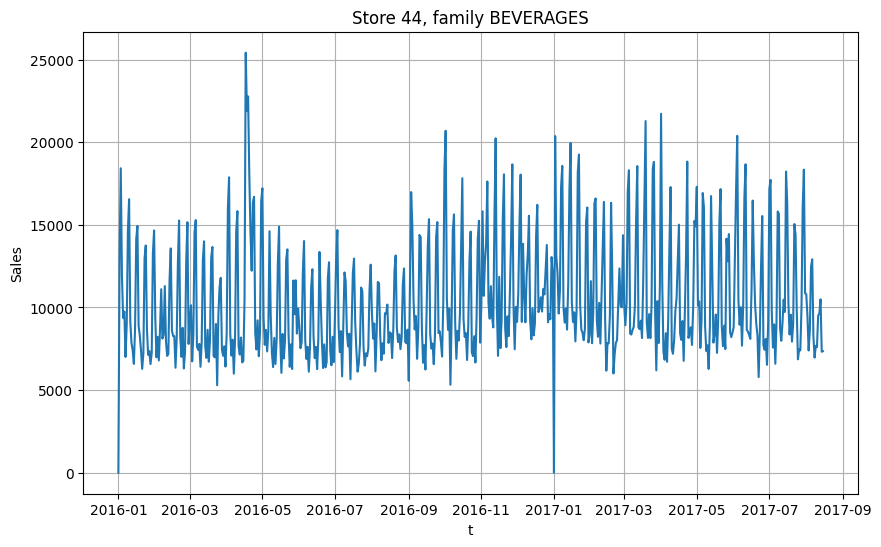

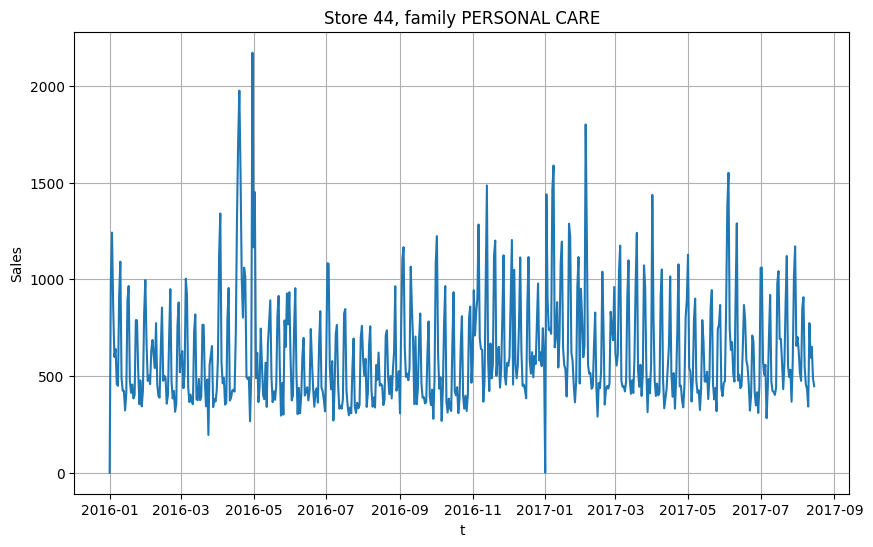

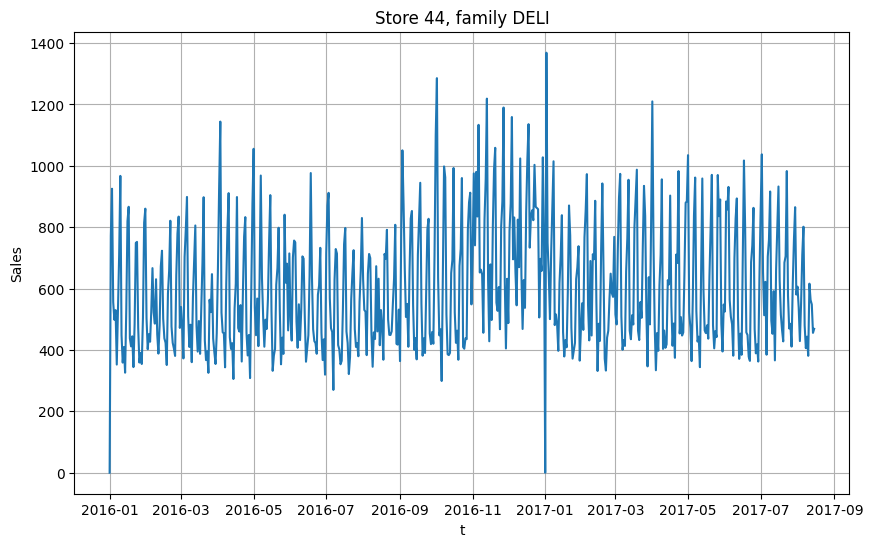

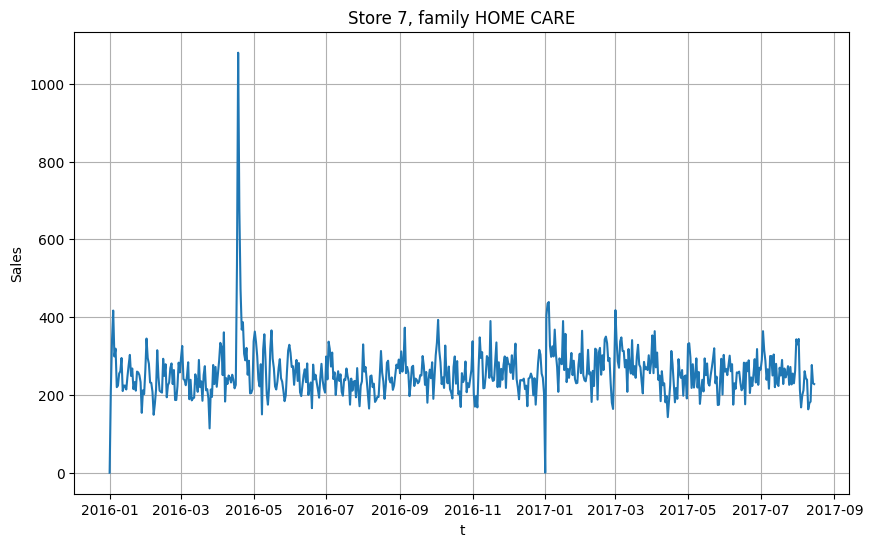

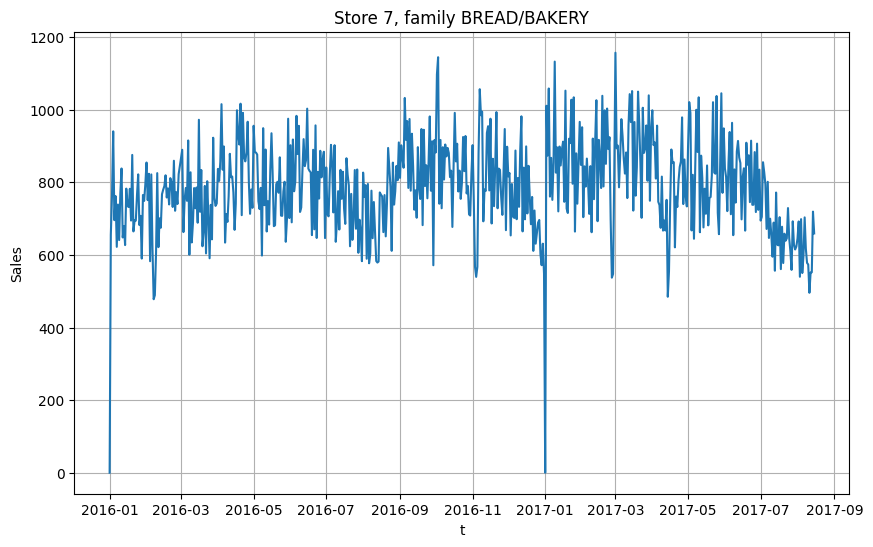

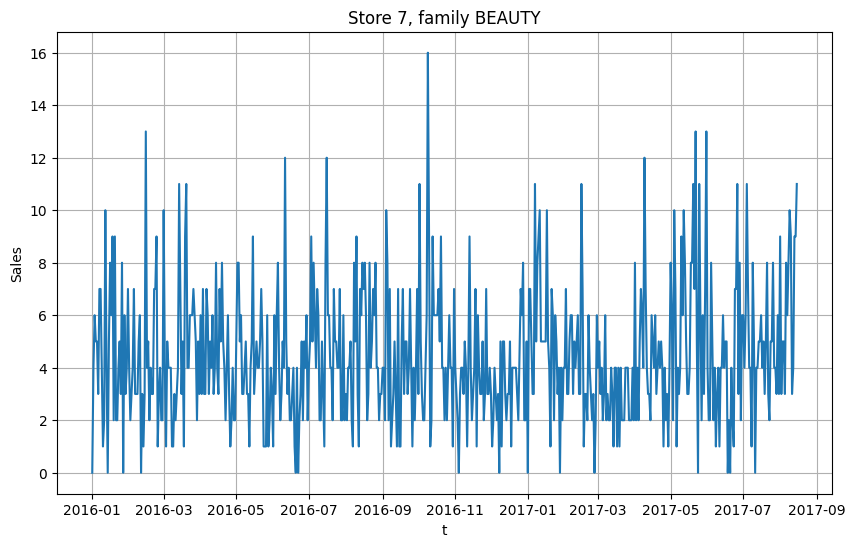

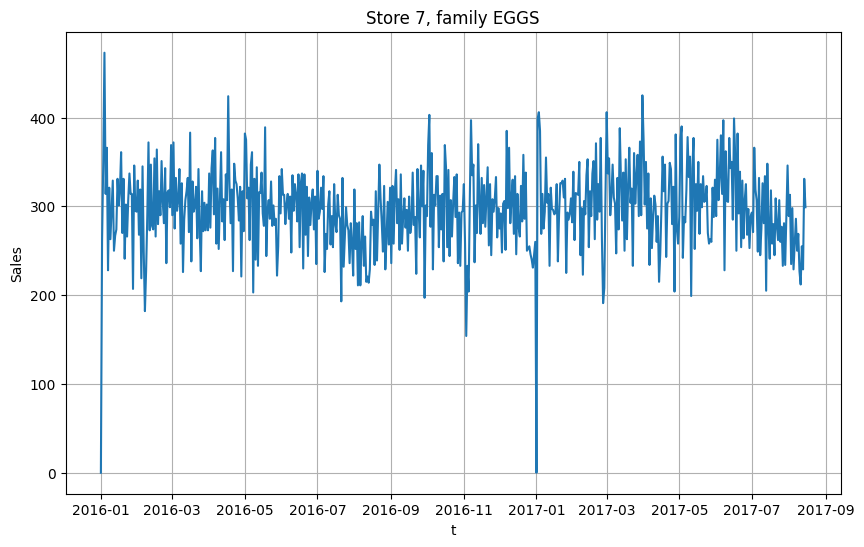

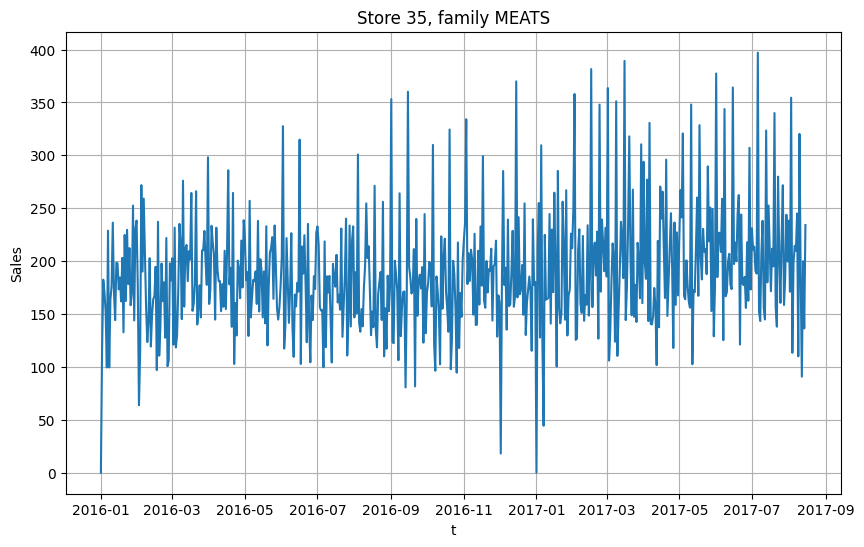

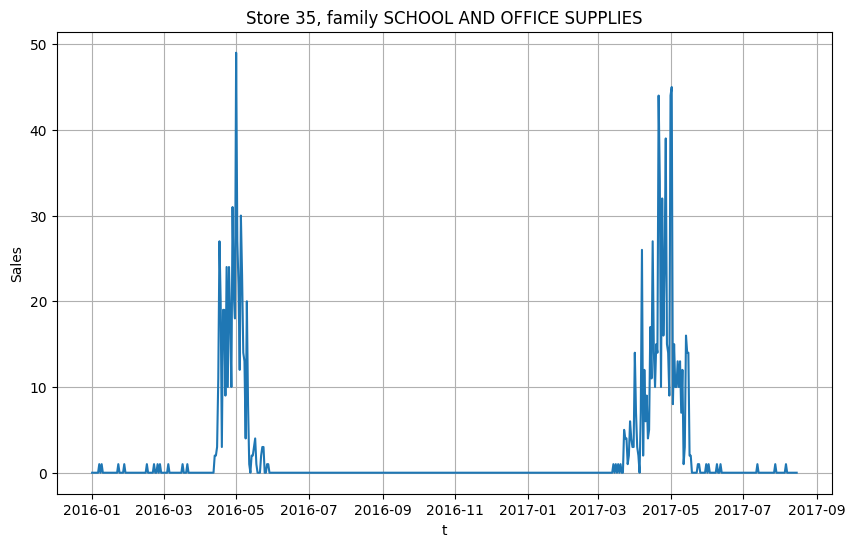

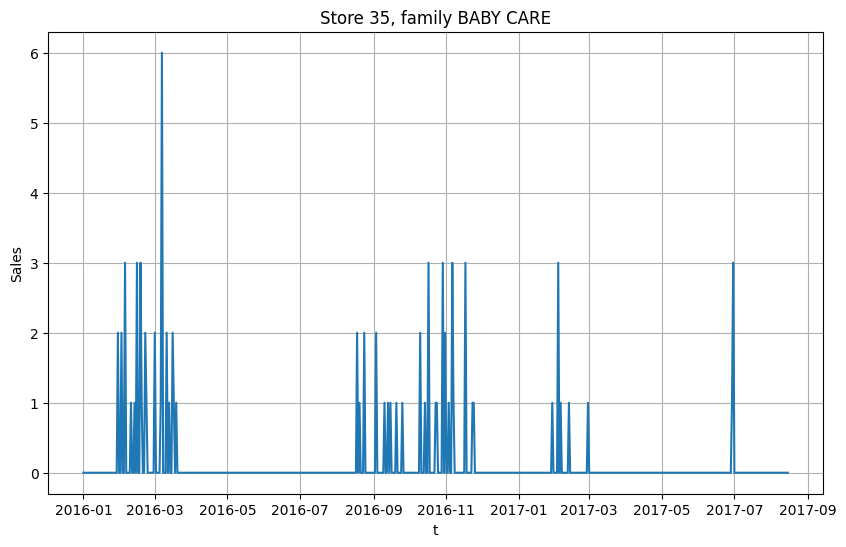

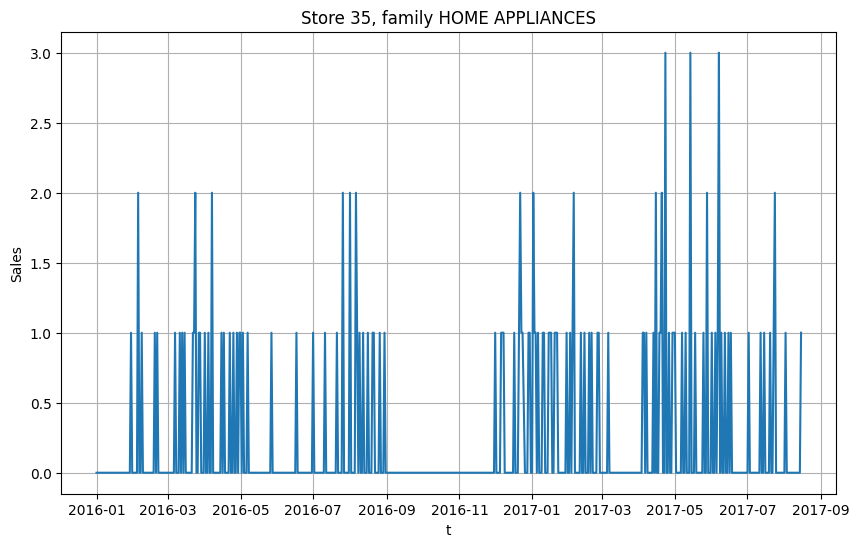

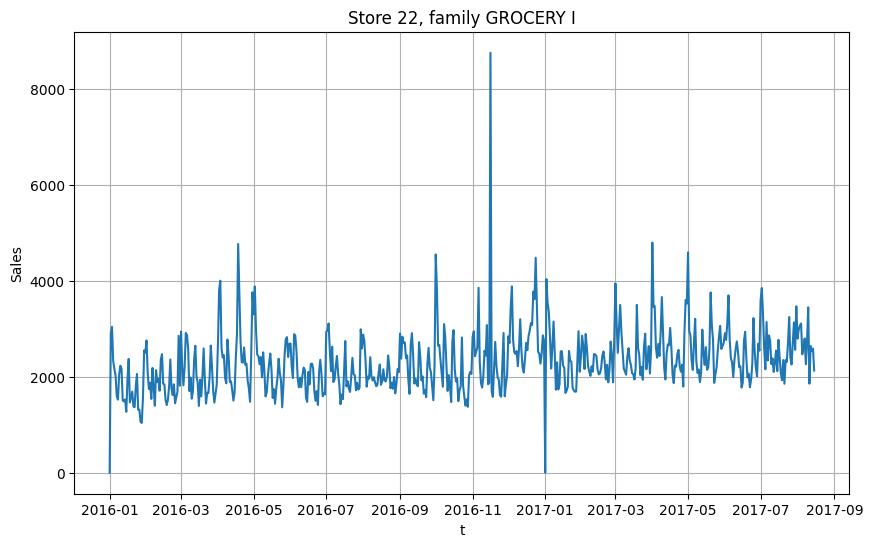

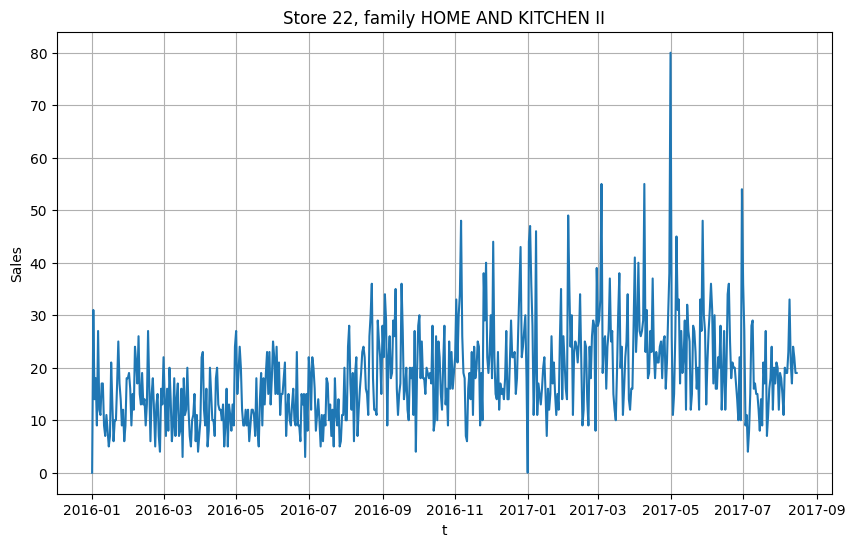

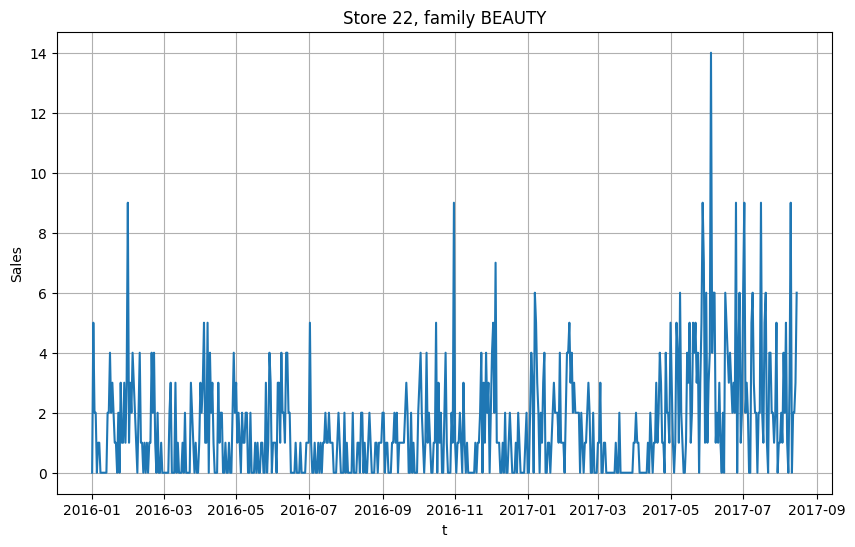

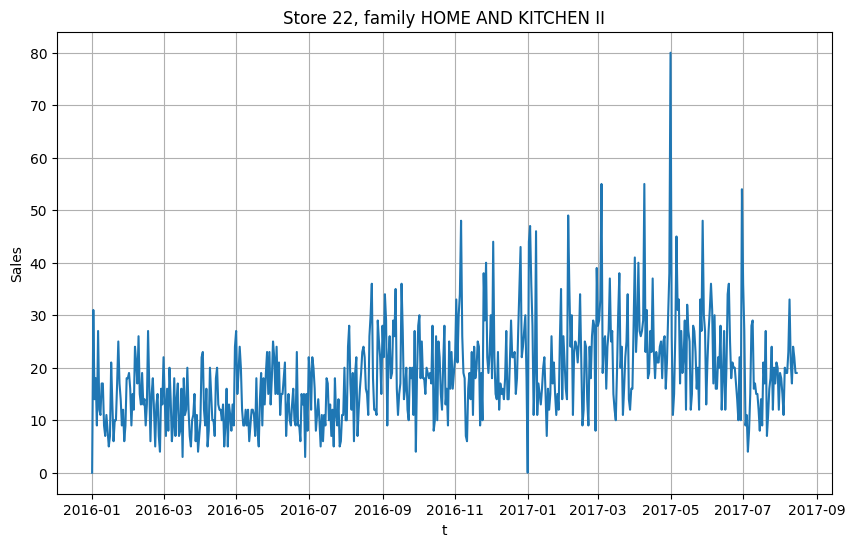

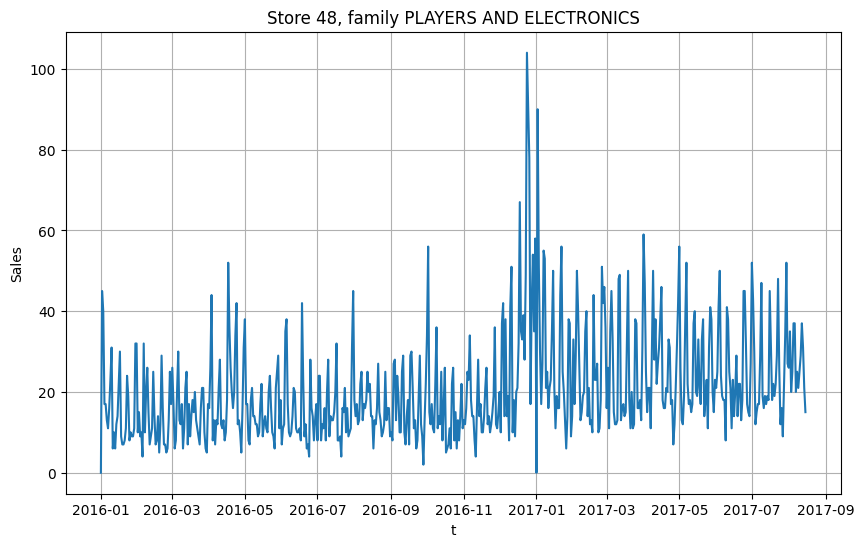

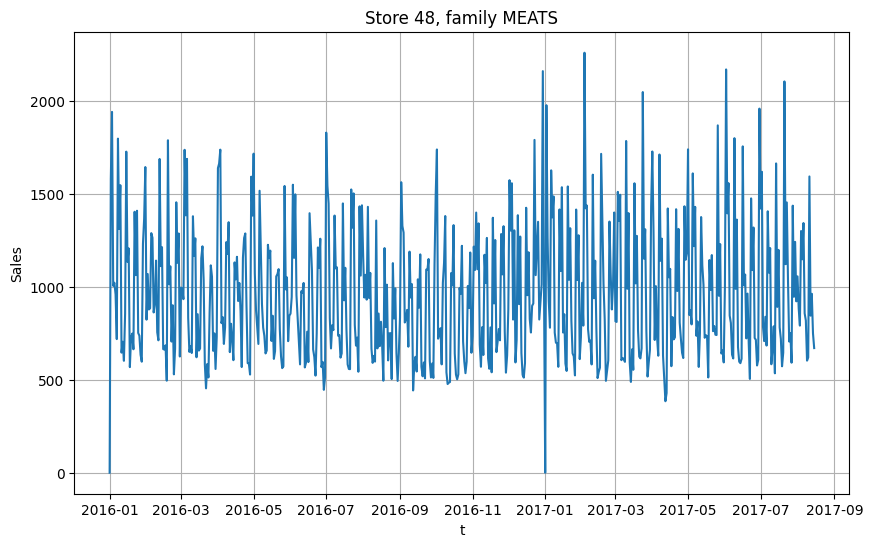

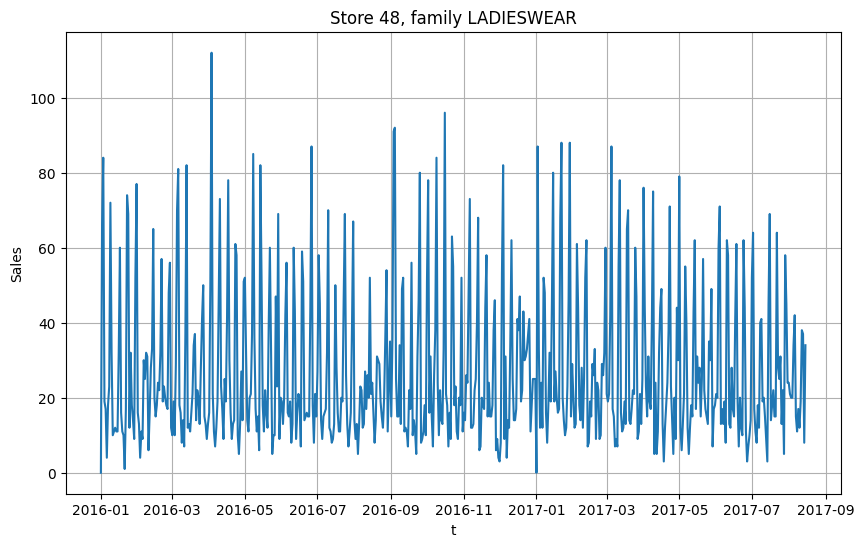

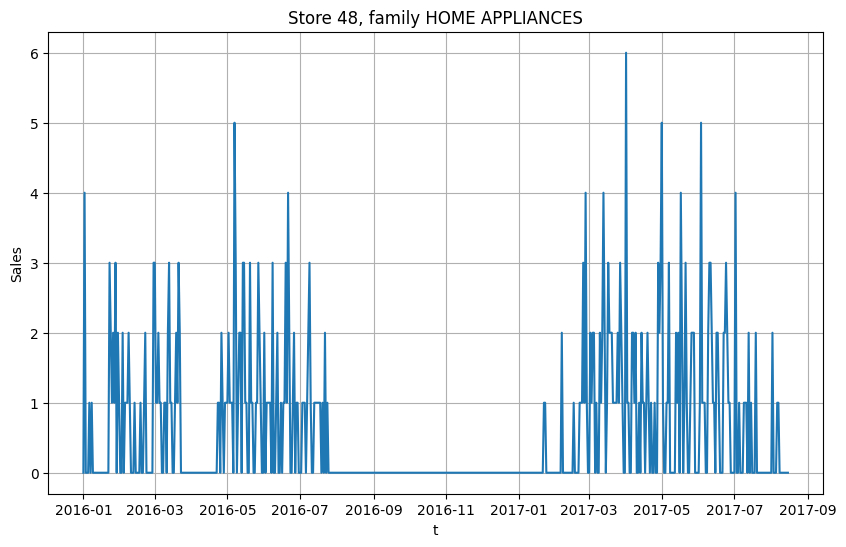

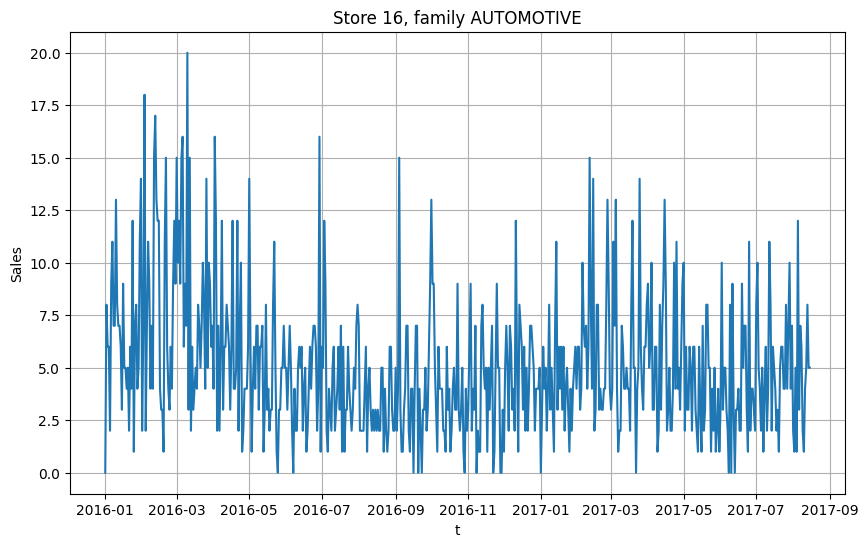

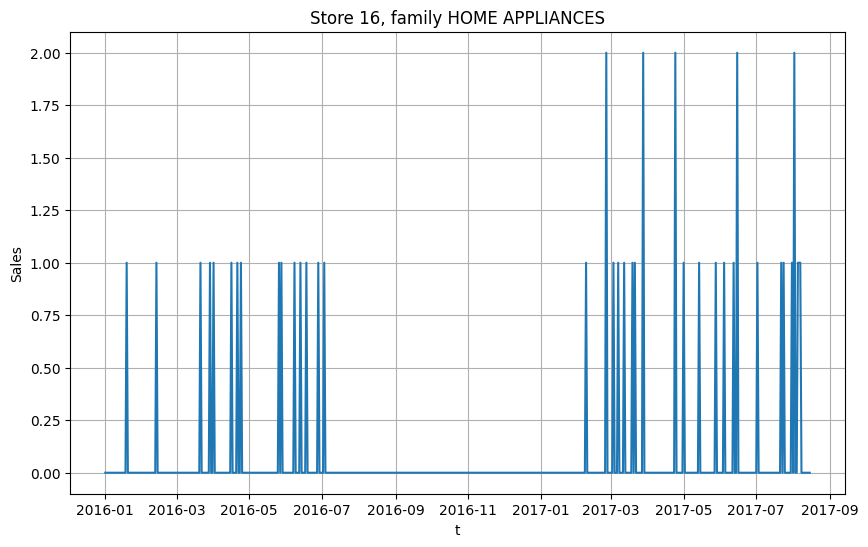

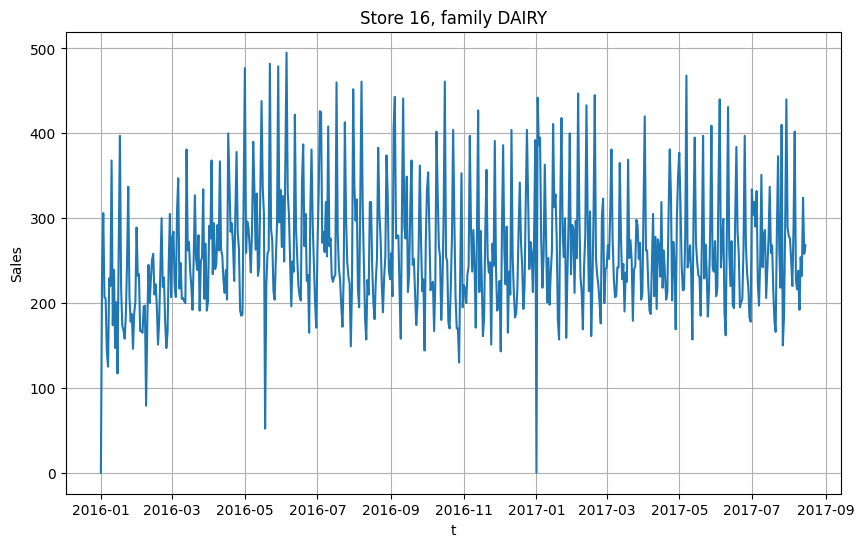

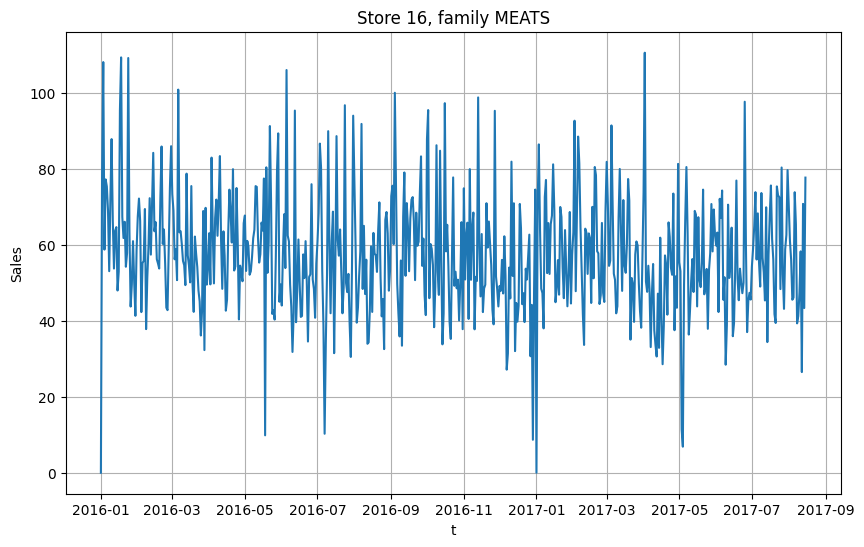

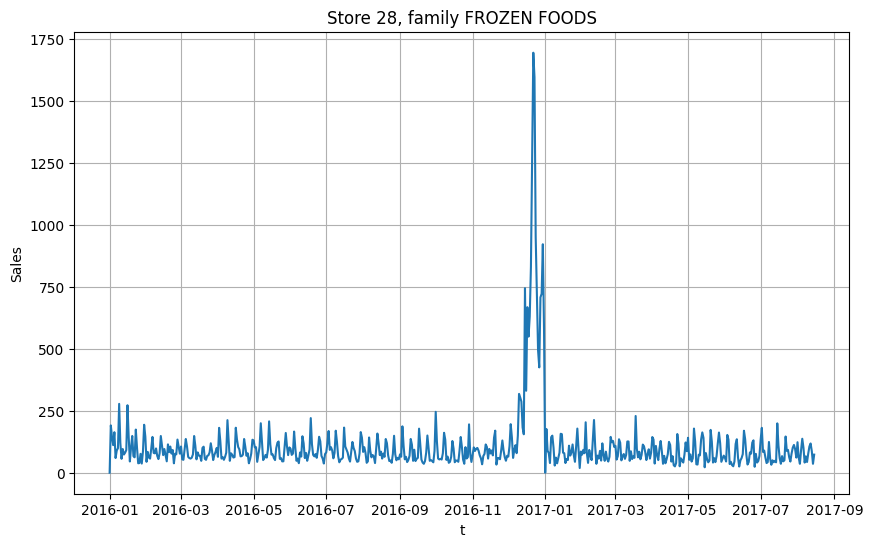

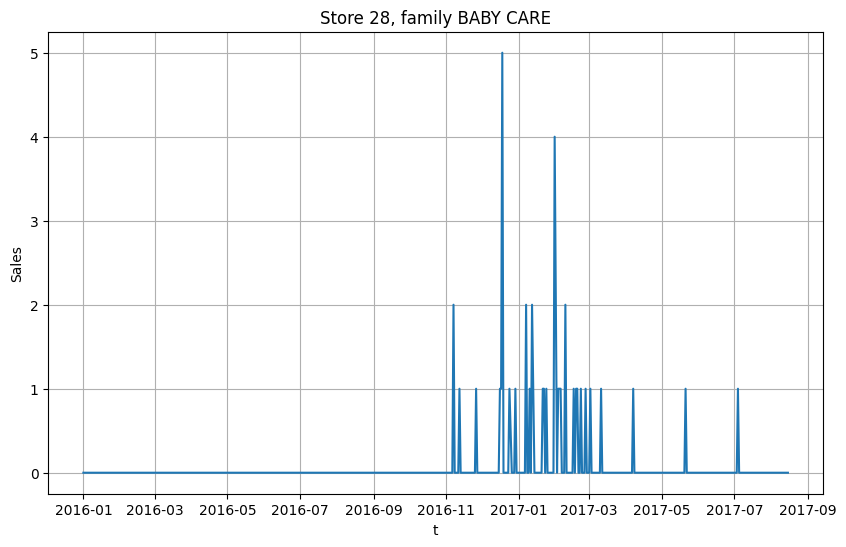

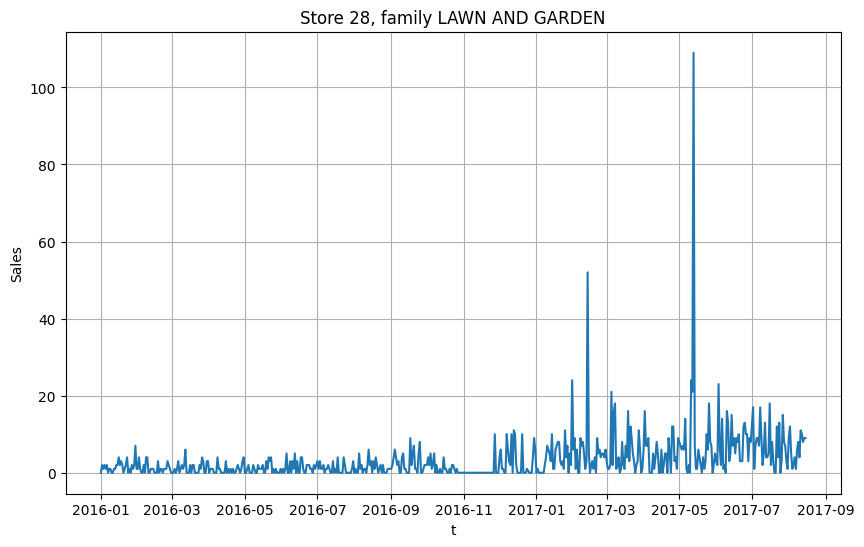

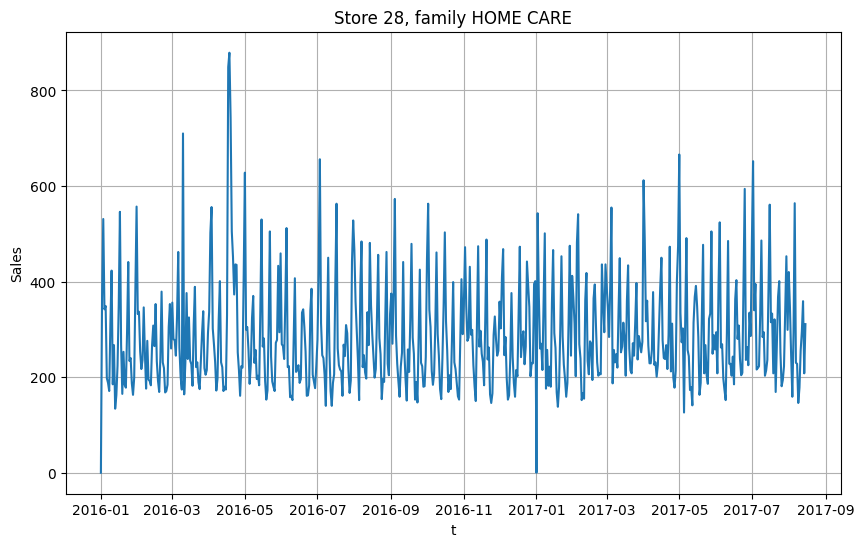

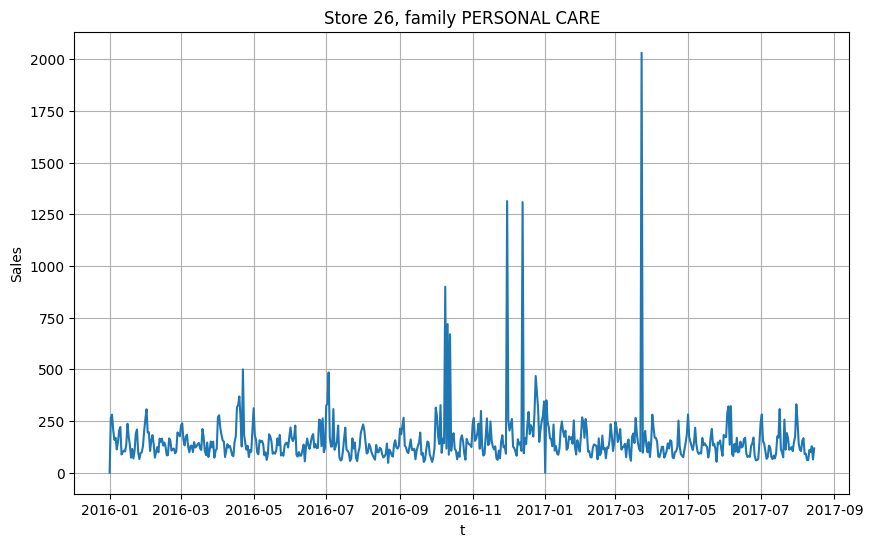

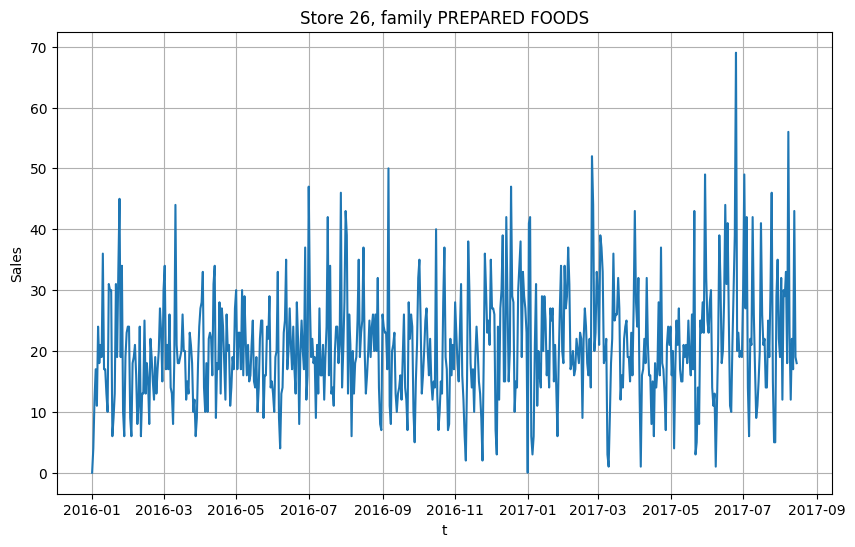

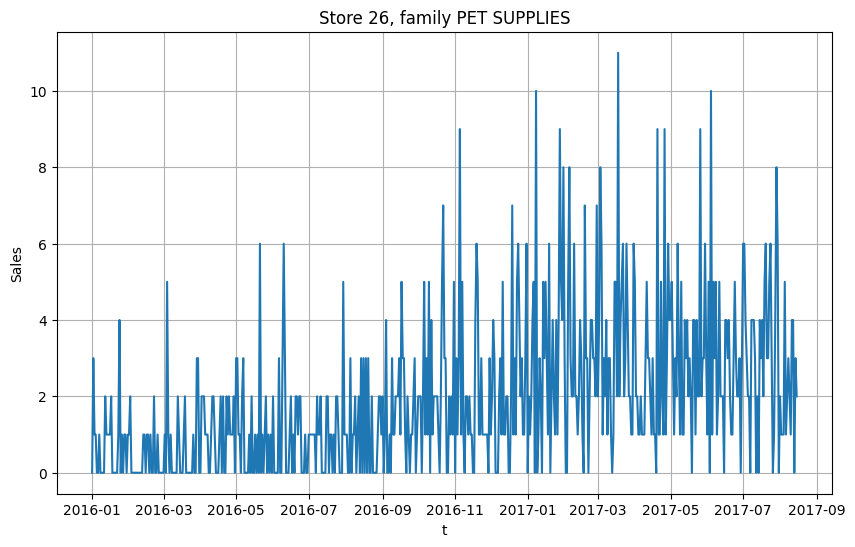

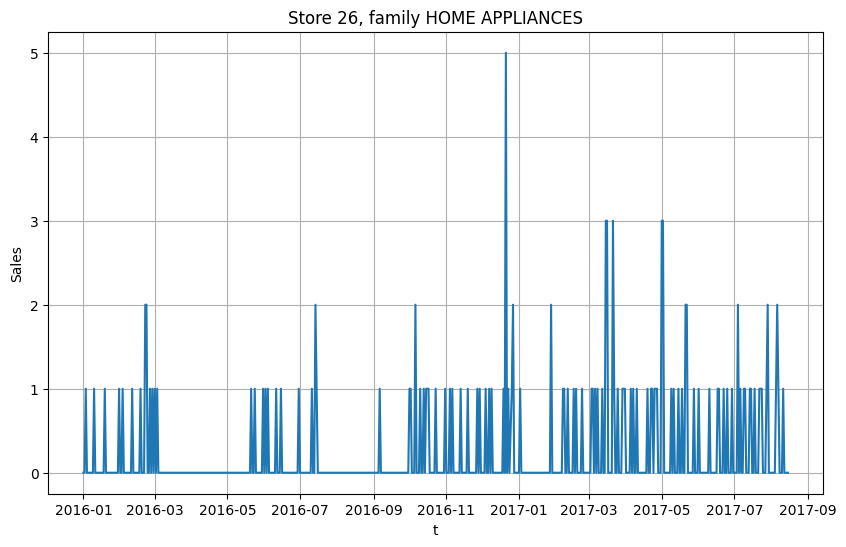

In [6]:
for rand_store, rand_fams in random_fam.items():
    for rand_fam in rand_fams:
        fig, ax = plt.subplots(figsize=(10, 6))

        sales_data = train_sales.loc[(train_sales["family"] == rand_fam) & 
                                     (train_sales["store_nbr"] == rand_store) &
                                     (train_sales["date"] >= "2016-01-01")]
        ax.plot(sales_data["date"].astype('datetime64[s]'), sales_data["sales"])

        ax.grid(True)
        ax.set_ylabel("Sales")
        ax.set_xlabel("t")
        ax.set_title(f"Store {rand_store}, family {rand_fam}")